In [16]:
#Let's take hipparcos dataset containing distances of stars and create a model describing 
#the probability distribution of the distances
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

9998
9998


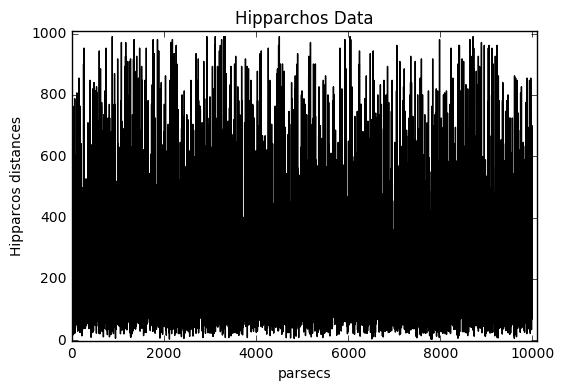

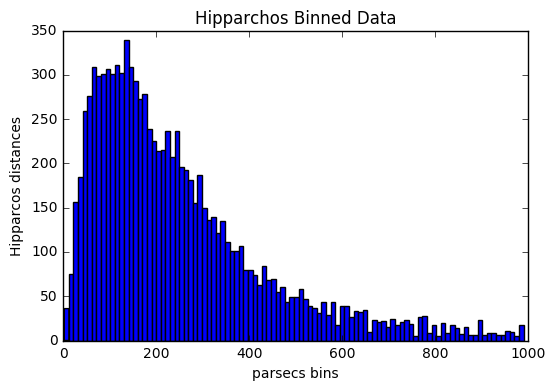

In [2]:
#data = pd.read_csv('hipparchos_subsample.dat', header = 'infer', delimiter = '\t')

#print data
#d = pd.DataFrame(data, index=index)
#data_range = np.arange(0,1000)


data = np.loadtxt('hipparchos_subsample.dat')
data_range = np.arange(0,9998)
print len(data_range)
print len(data)
plt.plot(data_range, data, color='black')
plt.title('Hipparchos Data')
plt.xlabel('parsecs'); plt.ylabel('Hipparcos distances')
plt.xlim(-1,10100); plt.ylim(-1,1010)
plt.show()

plt.hist(data, bins=100)
plt.title('Hipparchos Binned Data')
plt.xlabel('parsecs bins'); plt.ylabel('Hipparcos distances')
plt.show()

100
100
hipparchos counts: [ 25  61 149 179 248 278 302 300 306 307 312 313 303 337 328 278 283 290
 243 230 214 215 243 210 226 215 190 176 174 173 151 131 134 136 141 112
  94  95 109  77  91  64  75  66  69  77  65  41  44  54  53  61  38  39
  47  33  31  36  36  34  33  32  28  33  41  14  19  20  31  15  24  18
  21  14  19  14  26   8  28   1  22  20   9   9  23   7  15   6   6  10
  19   8   8   6   6  11  10   5   9   8]
bins: [    0.    10.    20.    30.    40.    50.    60.    70.    80.    90.
   100.   110.   120.   130.   140.   150.   160.   170.   180.   190.
   200.   210.   220.   230.   240.   250.   260.   270.   280.   290.
   300.   310.   320.   330.   340.   350.   360.   370.   380.   390.
   400.   410.   420.   430.   440.   450.   460.   470.   480.   490.
   500.   510.   520.   530.   540.   550.   560.   570.   580.   590.
   600.   610.   620.   630.   640.   650.   660.   670.   680.   690.
   700.   710.   720.   730.   740.   750.   760.   770.   780.

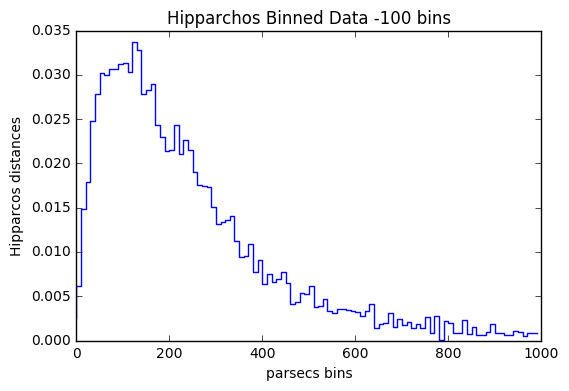

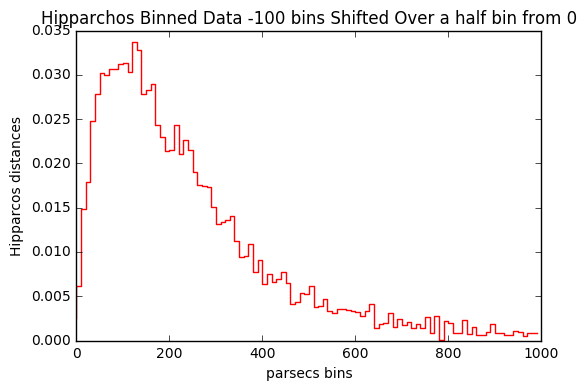

50
50


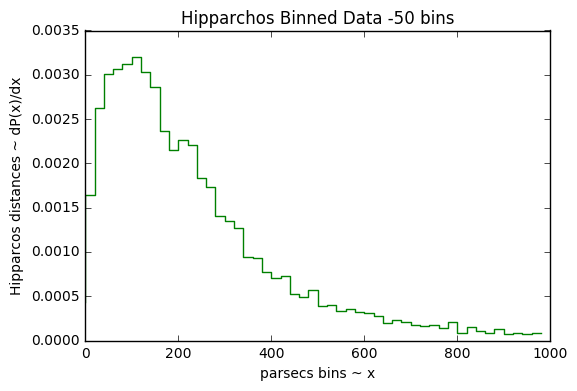

In [3]:
#Normalizing Data:
bins0 = np.linspace(0,1000,101) #start, stop, stepsize
counts0 = np.histogram(data, bins0)

bins = bins0[0:-1] #removes last element of bins

datalength = len(data)*1.0
counts = counts0[0]/datalength
print len(counts); print len(bins)

print "hipparchos counts:", counts0[0]
print "bins:", bins0
plt.step(bins, counts, color='blue')
plt.title('Hipparchos Binned Data -100 bins')
plt.xlabel('parsecs bins'); plt.ylabel('Hipparcos distances')

plt.show()
#^^^^ NOTE: At 0 there's about a half bin. We need to shift it over. EDIT: This happens for 
#                                                                          plt.step ONLY!!!
dmax = np.max(bins0); dmin =np.min(bins0)
binshift = (dmax-dmin)/(2.0*len(bins0))

bins1 = bins0[0:-1]#+binshift 
plt.step(bins1, counts, color='red')
plt.title('Hipparchos Binned Data -100 bins Shifted Over a half bin from 0')
plt.xlabel('parsecs bins'); plt.ylabel('Hipparcos distances')
plt.show()

#Example: 50 bins vs 100 bins
bins50 = np.linspace(0,1000,51)
dmax = np.max(bins50); dmin =np.min(bins50); binwidth = np.float(dmax-dmin)/50
binshift50 = (dmax-dmin)/(2.0*len(bins50))
binsfifty = bins50[0:-1] #+ binshift50
counts50 = np.histogram(data, bins50)
countsfifty = counts50[0]/(len(data)*1.0)/(binwidth)

print len(binsfifty); print len(countsfifty)
plt.step(binsfifty, countsfifty, color='green')
plt.title('Hipparchos Binned Data -50 bins')
plt.xlabel('parsecs bins ~ x'); plt.ylabel('Hipparcos distances ~ dP(x)/dx')
plt.show()

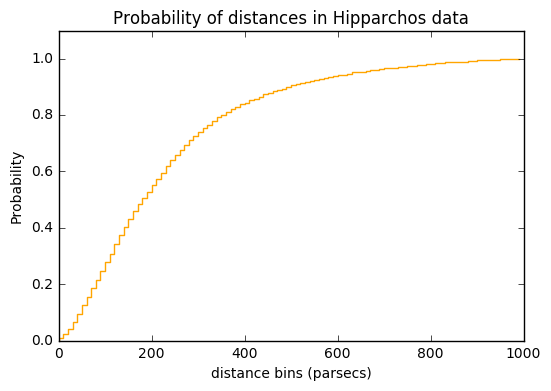

In [4]:
#Cumulative Probability:
CumulSum = np.cumsum(counts)
dmax = np.max(bins0); dmin =np.min(bins0)
binshift = (dmax-dmin)/(2.0*len(bins0))

bins1 = bins0[0:-1]#+binshift 
plt.step(bins1, CumulSum, color='Orange')
plt.title('Probability of distances in Hipparchos data')
plt.xlabel('distance bins (parsecs)'); plt.ylabel('Probability')
plt.ylim(0,1.1)
plt.show()

In [5]:
#Basic Statistics: Mean, Standard Deviation, Skewness, Kurtosis AKA 1st - 4th moments:
N = len(data)
Mean = np.sum(data/N); print Mean

std_dev = np.sqrt(np.sum((data-Mean)**2)/(N-1)); print std_dev

Skewness = np.sum((data-Mean)**3)/(N*(std_dev**3)); print Skewness

Kurtosis = np.sum((data-Mean)**4)/(N*(std_dev**4))-3; print Kurtosis

#Median
sorted_data = np.sort(data)
Median  = sorted_data[(len(data))/2]
print Median
print np.median(data)

247.775356071
188.709040028
1.41723317781
1.94316080512
196.5
196.5


In [6]:
#Percentiles
percentile16 = np.percentile(data, 16); print percentile16
percentile84 = np.percentile(data, 84); print percentile84

81.77
413.2


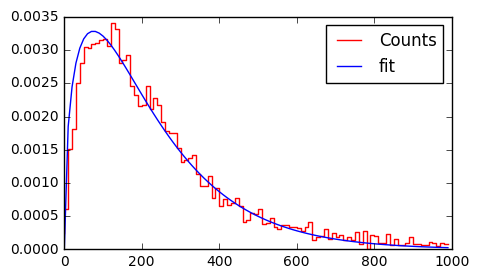

Binned Mean
247.775356071
Binned Sigma
173.628517155


In [7]:
#Fitting to approximate a Gaussian
y = np.sqrt(bins1)*np.exp((-1.0*bins1/150))
#print len(y); print len(bins1); 
dmax = np.max(bins1); dmin =np.min(bins1); binwidth = np.float((dmax-dmin)/100)
normalized_y = y/(np.sum(y)*binwidth)
counts_one_hundred = counts/binwidth


fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'blue', label = 'fit')
ax.legend(loc='best')
plt.show()


#Binned Mean
print('Binned Mean'); print np.mean(data)
BinMean= np.sum(normalized_y*bins1*binwidth)
n = len(data)

print('Binned Sigma'); sigma = np.sqrt(np.sum(((bins1-BinMean)**2)*(normalized_y*binwidth))) ; print sigma

In [8]:
#Binned Median
prob = 0
for i in range(len(bins1)):
    prob = prob + normalized_y[i]*binwidth 
    if prob<0.5:
        binFIFTY = i
print binFIFTY       
BinMedian = bins1[binFIFTY]; print BinMedian
print np.median(data)

17
170.0
196.5


[ 0.          0.01831877  0.04255463  0.07032304  0.10031932  0.13169329
  0.16384523  0.19633358  0.22882514  0.26106505  0.29285718  0.32405061
  0.35452986  0.38420771  0.41301961  0.44091937  0.46787576  0.49386978
  0.51889237  0.54294262  0.5660263   0.58815453  0.6093428   0.62961006
  0.64897801  0.66747049  0.68511294  0.70193198  0.71795503  0.73321004
  0.74772517  0.76152864  0.7746485   0.78711253  0.79894807  0.81018194
  0.82084039  0.83094897  0.84053257  0.84961529  0.85822048  0.86637071
  0.87408773  0.88139249  0.88830515  0.89484506  0.9010308   0.90688017
  0.9124102   0.9176372   0.92257673  0.92724368  0.93165224  0.93581595
  0.9397477   0.94345978  0.94696389  0.95027114  0.95339213  0.95633689
  0.95911498  0.96173548  0.96420698  0.96653766  0.96873527  0.97080714
  0.97276025  0.97460118  0.97633619  0.97797119  0.9795118   0.9809633
  0.98233072  0.98361881  0.98483204  0.98597468  0.98705072  0.98806397
  0.98901801  0.98991622  0.99076181  0.99155779  0.

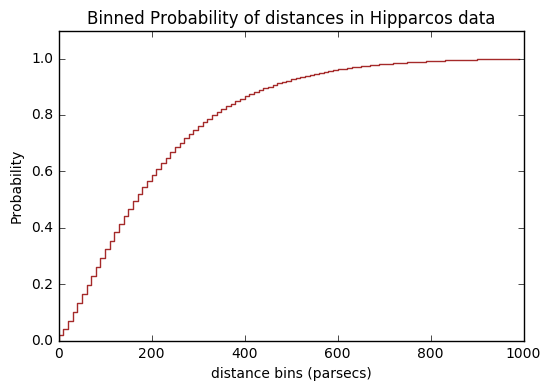

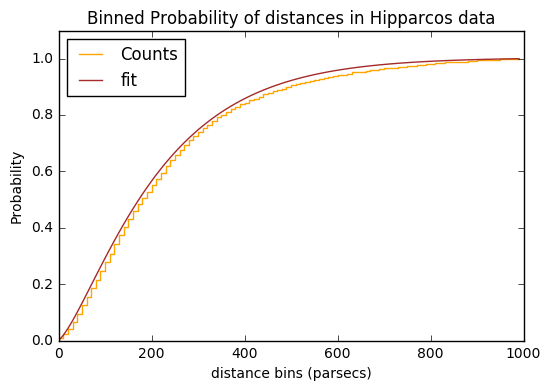

In [9]:
#Binned Cumulative Probability(SUM):

BinCumulSum = np.cumsum(normalized_y*binwidth)
print BinCumulSum

plt.step(bins1, BinCumulSum, color='brown')
plt.title('Binned Probability of distances in Hipparcos data')
plt.xlabel('distance bins (parsecs)'); plt.ylabel('Probability')
plt.ylim(0,1.1)
plt.show()

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, CumulSum, color = 'orange', label='Counts')
ax.plot(bins1, BinCumulSum, color = 'brown', label = 'fit')
plt.title('Binned Probability of distances in Hipparcos data')
plt.xlabel('distance bins (parsecs)'); plt.ylabel('Probability')
plt.legend(loc='best')
plt.ylim(0,1.1)
plt.show()

In [10]:
#---------------------------------------Day 2-----------------------------------------------
# Attempting a K-S Test. Finding the maximum difference in probability (y-axis) in every bin.
ProbDiff = BinCumulSum - CumulSum
print ProbDiff.max()
print np.argmax(np.abs(ProbDiff)) # returns the index number of the maximum element of this ProbDiff array
print bins1[np.argmax(np.abs(ProbDiff))]

0.0461681901595
12
120.0


For one trial:
[  0.00000000e+00   1.00000000e-02   2.00000000e-02 ...,   9.99700000e+01
   9.99800000e+01   9.99900000e+01]
68 %
100.0513
9.53760285973


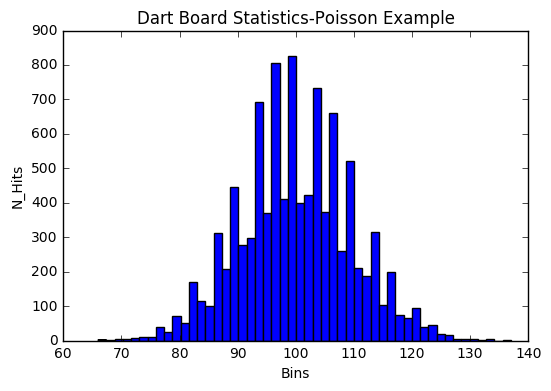

In [12]:
#Example, random counting in one experiment
Random = np.array(np.random.uniform(0,1,1000))
#print N[np.where(N < 0.1)]
print "For one trial:"
#print len(N[np.where(N < 0.1)])

#Let's repeat this experiment 10,000 times and plot the results
N_hits = []
for ii in range(0,10000):
    N = np.array(np.random.uniform(0,1,1000))
    N_hits.append(len(N[np.where(N < 0.1)]))


#Creating Bins
Bins = np.linspace(0,100,10001)
bins = Bins[0:-1]

len(bins)
print bins

#counts = np.histogram(N_hits, bins)
plt.hist(N_hits, bins=50)
plt.xlabel('Bins')
plt.ylabel('N_Hits')#Let's see how much of this distribution is between 90 and 110:
N_hits = np.array(N_hits)
tmp = N_hits[[N_hits>90]] # Both require 
N_hits2 = tmp[[tmp<110]]  # two brackets [[]]

print len(N_hits2)/100,'%' # Number of hits between 90 and 110/

print np.mean(N_hits) ; print np.std(N_hits)
plt.title('Dart Board Statistics-Poisson Example')
plt.show()

In [13]:
#Let's see how much of this distribution is between 90 and 110:
N_hits = np.array(N_hits)
tmp = N_hits[[N_hits>90]] # Both require 
N_hits2 = tmp[[tmp<110]]  # two brackets [[]]

print len(N_hits2)/100,'%' # Number of hits between 90 and 110/

print np.mean(N_hits) ; print np.std(N_hits)

68 %
100.0513
9.53760285973


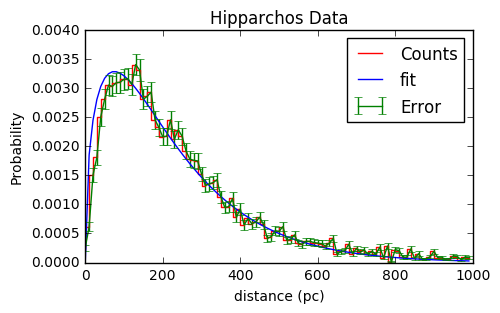

In [14]:
#Let's look back at the orignal histogram for Hipparcos Data

N_tot = np.float(len(counts))
sigma = np.sqrt(counts)/N_tot/binwidth ; #print sigma 
dPddist = counts/N_tot/binwidth

counts_one_hundred = counts/binwidth

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'blue', label = 'fit')
ax.errorbar(bins1, counts_one_hundred, yerr=sigma, color = 'green', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
plt.show()

In [17]:
#Chi Squared

chisq = np.sum(((counts_one_hundred - normalized_y)/sigma)**2) ; print chisq

#convert to Probabaility (P-value)
#degrees of freedom: number of data points-free parameters ~ # of bins = 100
P_Value = 1 - stats.chi2.cdf(chisq,100); print P_Value 
#stats.chi2.cdf() gives probability that model is ruled out.
#one minus stats.chi2.cdf() gives probability that model agrees with data
P_Value2 = 1 - stats.chi2.cdf(30,100); print P_Value2 #where chisq = 50, very good fit!

664.270156629
0.0
0.999999999999


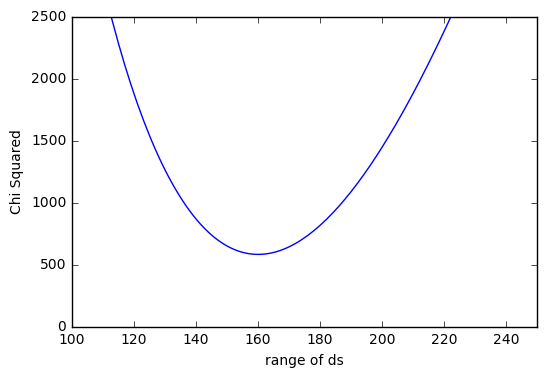

minimum chi squared value: 581.480881788
best ds for fit: 160.06402561


In [18]:
#--------------------------------------Day 3---------------------------------------------------
#Let's tackle a better fit for the hipparchos data
#To do this, let's write a for loop that will construct a new fit, Y, and calculate chi sq. for
#each iteration:
ds = np.linspace(0,2500,2500)

ChiSq = []
for ii in range(0,len(ds)):
    Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))
    Normalized_Y = Y/(np.sum(Y)*binwidth)
    ChiSq.append(np.sum(((counts_one_hundred - Normalized_Y)/sigma)**2))

ChiSq = np.array(ChiSq)
ChiSq = ChiSq[~np.isnan(ChiSq)] #removing nan value from first element


ds = ds[0:-1] #to match dimensions as ChiSq 
#print len(ChiSq), len(ds)

plt.plot(ds,ChiSq)
plt.xlabel('range of ds')
plt.ylabel('Chi Squared')
plt.ylim(0,2500)
plt.xlim(100,250)
plt.show()

print "minimum chi squared value:",np.min(ChiSq)
print "best ds for fit:",ds[np.argmin(ChiSq)]

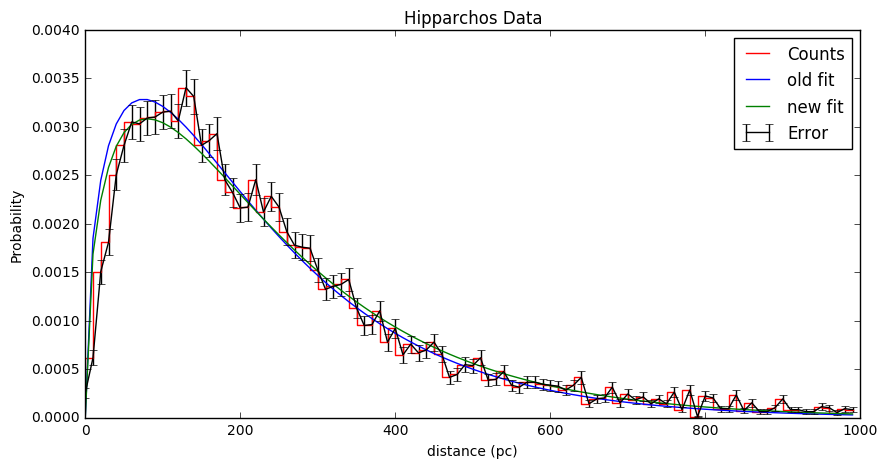

Reduced Chi Squared for Fit 1: 5.87354426049


In [19]:
ds_min = ds[np.argmin(ChiSq)]
new_Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds_min))
norm_Y = new_Y/(np.sum(new_Y)*binwidth)
                              
#Try out ds_min in a plot:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'blue', label = 'old fit')
ax.plot(bins1,norm_Y, color = 'green', label = 'new fit')
ax.errorbar(bins1, counts_one_hundred, yerr=sigma, color = 'black', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
plt.show()

DOF = len(bins1) - 1 #1 parameter ds
Reduced_ChiSq = np.min(ChiSq)/ DOF; print "Reduced Chi Squared for Fit 1:", Reduced_ChiSq

In [20]:
#Let's change Y again to improve chi squared: Y = (x^p)* e^(-x/ds)

DS=np.linspace(1,250,500)
P =np.linspace(0,2,500); 
len(DS)

ChiSq2 = np.empty((DS.size,P.size)); 

#ChiSq2 = []
for ii in range(len(DS)):
    for jj in range(len(P)):
        Y2 = (bins1**(P[jj]))*np.exp((-1.0*bins1/(DS[ii])))
        Normalized_Y2 = Y2/(np.sum(Y2)*binwidth)
        ChiSq2[ii,jj] = (np.sum(((counts_one_hundred - Normalized_Y2)/sigma)**2))
        
print "Minimum Chi Squared value for new model:", np.min(ChiSq2)

Minimum Chi Squared value for new model: 339.110574505


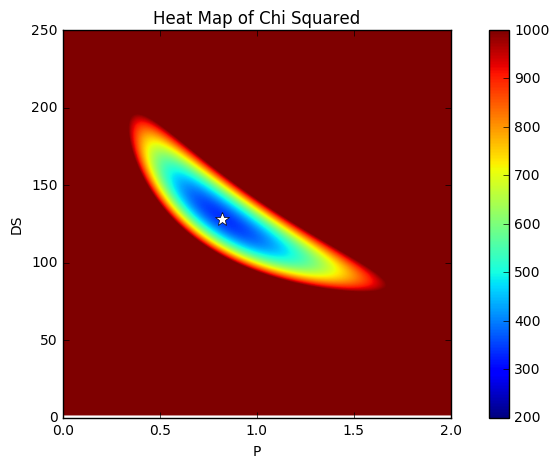

Minimum Chi Squared value for new model: 339.110574505
best DS value: 128.244488978
best P value: 0.821643286573


In [21]:
i,j = np.where(ChiSq2==np.min(ChiSq2))
#print i; print j

new_Y2 = (bins1**i)*np.exp((-1.0*bins1/j))
norm_Y2 = new_Y2/(np.sum(new_Y2)*binwidth)

#plt.pcolormesh(x, y, intensity)
#plt.colorbar() #need a colorbar to show the intensity scale
#plt.show()
DS_best =DS[i[0]]; P_best=P[j[0]]


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
im = ax.imshow(ChiSq2,extent=([P[0],P[-1],DS[0],DS[-1]]), aspect=0.008, vmin=200, vmax=1000, origin='lower')
fig.colorbar(im)
plt.plot(P_best,DS_best, markersize=10,color='white', marker='*')
plt.xlabel('P')
plt.ylabel('DS')
plt.title('Heat Map of Chi Squared')
plt.show()

print "Minimum Chi Squared value for new model:", np.min(ChiSq2)
print "best DS value:", DS_best; print "best P value:", P_best


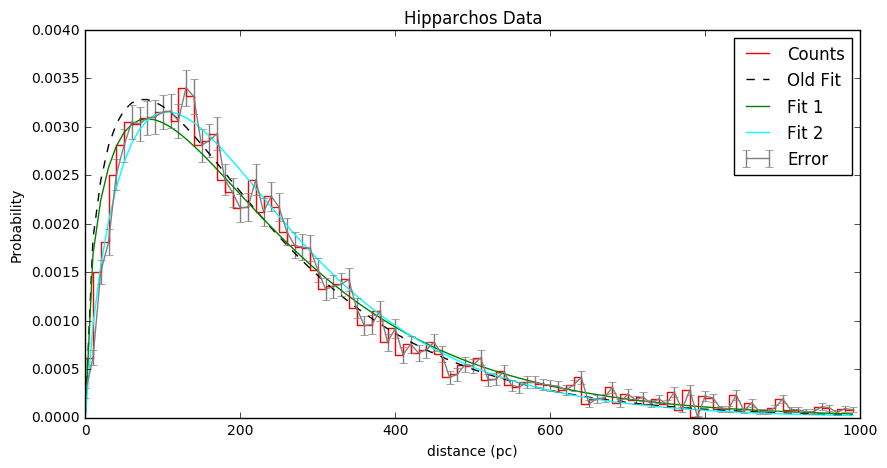

Reduced Chi Squared for Old Fit: 6.7097995619
Reduced Chi Squared for Fit 1: 5.87354426049
Reduced Chi squared for Fit 2: 3.46031198475


In [22]:
new_Y2 = (bins1**P_best)*np.exp((-1.0*bins1/DS_best))
norm_Y2 = new_Y2/(np.sum(new_Y2)*binwidth)


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'black', label = 'Old Fit', linestyle='--')
ax.plot(bins1,norm_Y, color = 'green', label = 'Fit 1')
ax.plot(bins1,norm_Y2, color = 'cyan', label = 'Fit 2')
ax.errorbar(bins1, counts_one_hundred, yerr=sigma, color = 'grey', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
#ax.set_axis_bgcolor('black') #color the background
plt.show()

DOF2 = len(bins1)-2 #2 parameters
dof = len(bins1)-0 #no parameters in old fit
Reduced_ChiSq0 =np.min(chisq)/ DOF; print "Reduced Chi Squared for Old Fit:", Reduced_ChiSq0
Reduced_ChiSq = np.min(ChiSq)/ DOF; print "Reduced Chi Squared for Fit 1:", Reduced_ChiSq
Reduced_ChiSq2 = np.min(ChiSq2) / DOF2 ; print "Reduced Chi squared for Fit 2:", Reduced_ChiSq2

In [23]:
#Create 5 random points
#one experiment
r = np.random.rand(2,5); print r
mean_r = np.mean(r); print mean_r



#Now do this a BUNCH of times (for loop it!)

number = 1000
iterations= 10000
MeanR1 = []; R1 = [];MeanR2 = []; R2 = [];STD_R1= [];STD_R2= []
for ii in range(0,iterations):
    Rand1 = np.random.rand(number)
    Rand2 = np.random.rand(number)
    R_avg1 = np.mean(Rand1)
    R_avg2 = np.mean(Rand2)
    MeanR1.append(R_avg1); #fills average random values to an array
    MeanR2.append(R_avg2);
    R1.append(Rand1)
    R2.append(Rand2)
    R_STD1 = np.std(Rand1,ddof=1) 
    R_STD2 = np.std(Rand2,ddof=1)
    STD_R1.append(R_STD1) #fills std_dev of random values to an array
    STD_R2.append(R_STD2)

R = [R1,R2]
STD_R = [STD_R1,STD_R2]



#Let's plot a histogram of the error
#error in x = mean-center
MeanR1= np.array(MeanR1)
MeanR2= np.array(MeanR2)

center = [np.linspace(0.5,0.5,iterations),np.linspace(0.5,0.5,iterations)]
MeanR = [MeanR1,MeanR2]
Error_X = np.abs(np.subtract(MeanR, center))


STD_over_N_R = np.divide(STD_R , np.sqrt(number))

[[ 0.11644547  0.63550019  0.20944585  0.65676115  0.79518304]
 [ 0.43124787  0.96588472  0.23960349  0.57100533  0.49634424]]
0.511742135985


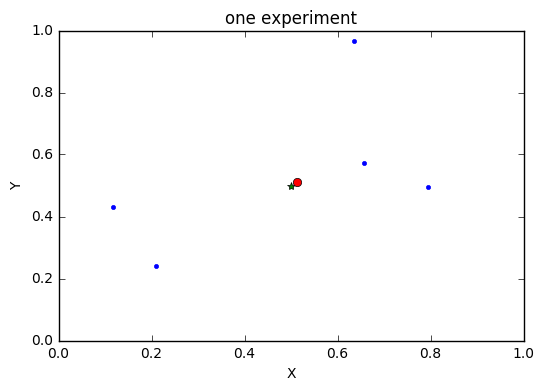

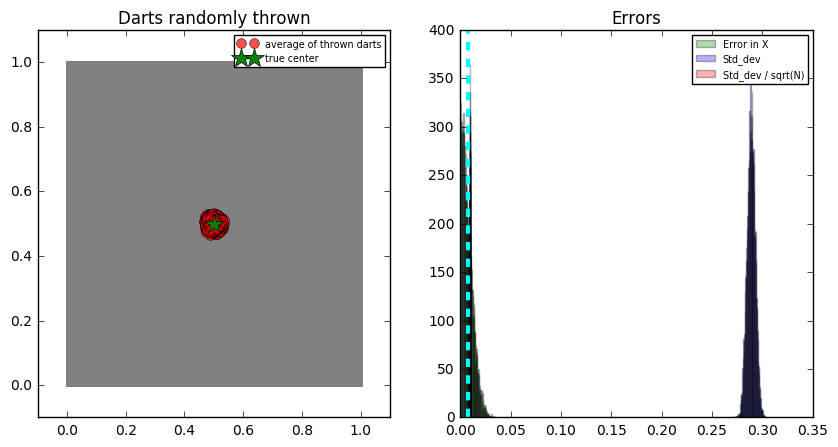

In [24]:
plt.plot(r[0],r[1], marker='.', linestyle='none')
plt.plot(0.5,0.5,marker='*')
plt.plot(mean_r,mean_r,marker='o', color='red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('one experiment')
plt.show()

Mean_of_Error_X = np.mean(Error_X[0])

fig = plt.figure(figsize=(10,5))

bx = fig.add_subplot(121)
bx.plot(R1,R2, marker='.', linestyle='none', color='grey',markersize=3,alpha=0.3)
bx.plot(MeanR1, MeanR2, marker='o', color='red',linestyle='none', markersize = 7,alpha=0.7, label='average of thrown darts' )
bx.plot(0.5,0.5,marker='*', markersize=15, color='green', alpha = 10, label='true center')
bx.set_xlim(-0.1,1.1)
bx.set_ylim(-0.1,1.1)
bx.set_title("Darts randomly thrown")
bx.legend(loc='upper right',fontsize = 'x-small')

ax = fig.add_subplot(122)    # The big subplot
ax.hist(Error_X[0], bins=100, label='Error in X', alpha=0.3, color='green')
ax.hist(STD_R[0], bins=100, label='Std_dev', alpha=0.3, color='blue')
ax.hist(STD_over_N_R[0], bins=100, label='Std_dev / sqrt(N)', alpha=0.3, color='red')
ax.axvline(x=Mean_of_Error_X, color='cyan', linewidth=3, linestyle='--')
ax.set_title("Errors")
ax.legend(loc='upper right',fontsize = 'x-small')

plt.show()

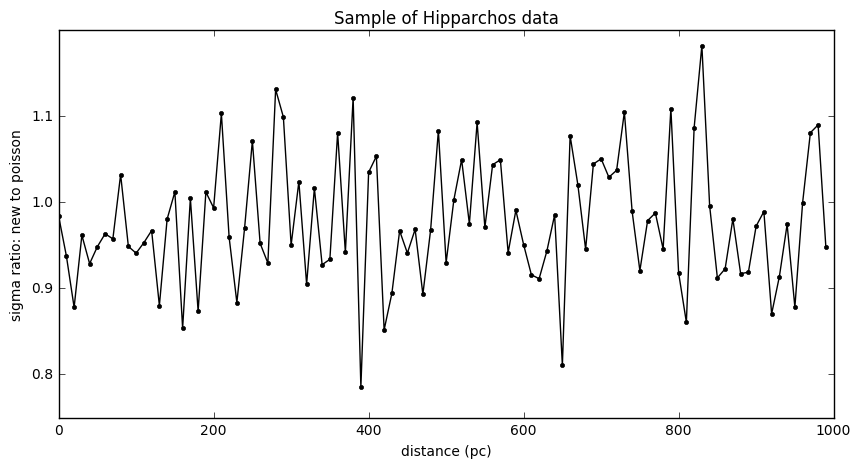

In [25]:
#------------------------------------Bootstrap sampling-----------------------------------------------------

# 1st decide how big sample of data will be, use np.random.choice(data, samplesize)

iterations = 100
samplesize = 10000
Nbins = len(bins1)

datalength = len(data)
bin_sample = np.linspace(0,1000,101)
bins = bin_sample[0:-1]
dmax_sample = np.max(bins); dmin_sample =np.min(bins)
binwidth_sample = np.float(dmax_sample-dmin_sample)/Nbins

sample = [] ; SCounts0 = np.empty((iterations,Nbins)); sample = np.empty((iterations,Nbins))
#sampling the data
for ii in range(0,Nbins):
    samp = np.random.choice(data,samplesize)
    sample_counts0 = np.histogram(samp, bin_sample)
#    SCounts0.append(sample_counts0)
    #sample.append(sample_counts[0]/ datalength/binwidth_sample)
#   sample.append(sample_counts)
    SCounts0[ii,:] = sample_counts0[0]/float(datalength)/binwidth_sample
    sample[ii,:] = sample_counts0[0]

#print SCounts0

new_sigma = np.std(SCounts0, axis=0) #error in sample

#poisson_sigma = np.sqrt(counts0)/float(datalength)/binwidth_sample

sigma_ratio = new_sigma/sigma #new error over original hipparcos error 

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.plot(bins, sigma_ratio, color='black', marker = '.')
ax.set_title('Sample of Hipparchos data')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('sigma ratio: new to poisson')
plt.show()

In [28]:
#------------------------------------From Day 3------------------------------------------------------------------------

#From Day 2:
data = np.loadtxt('hipparchos_subsample.dat')
data_range = np.arange(0,9998)

bins0 = np.linspace(0,1000,101)
bins1 = bins0[0:-1] #100 bins from 0 to 1000

bins_tenthousand0 = np.linspace(0,1000, 10001)
bins_tenthousand = bins_tenthousand0[0:-1] #10,000 bins from 0 to 1000

counts0 = np.histogram(data, bins0)
datalength = len(data)*1.0 #100
counts = counts0[0]/datalength
dmax = np.max(bins1); dmin =np.min(bins1)
binwidth = np.float(dmax-dmin)/len(bins1)

dmax_tenthou = np.max(bins_tenthousand); dmin_tenthou =np.min(bins_tenthousand)
binwidth_tenthou = np.float(dmax_tenthou-dmin_tenthou)/len(bins_tenthousand)

N_tot = np.float(len(counts)) #10,000 stars
sigma = np.sqrt(counts)/N_tot/binwidth ; #sigma for 100 bins, 10,000 stars
dPddist = counts/N_tot/binwidth
counts0 = np.histogram(data, bins0)
datalength = len(data)*1.0
counts = counts0[0]/datalength
counts_one_hundred = counts/binwidth

y = np.sqrt(bins1)*np.exp((-1.0*bins1/150)) #first model for 100 bins
normalized_y = y/(np.sum(y)*binwidth)

y_tenthou =np.sqrt(bins_tenthousand)*np.exp((-1.0*bins_tenthousand/150)) #first model for 10,000 bins
normalized_y_tenthou = y_tenthou/(np.sum(y_tenthou)*binwidth_tenthou)


chisq = np.sum(((counts_one_hundred - normalized_y)/sigma)**2) ; print "chi squared:", chisq
P_Value = 1 - stats.chi2.cdf(chisq,100); print "p-value:", P_Value 
#Input for stats.chi2.cdf(chisq , d.o.f.)




ds = np.linspace(0,2500,2500) # a range of values to test first model with

ChiSq = []
for ii in range(0,len(ds)):
    Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))
    Normalized_Y = Y/(np.sum(Y)*binwidth)
    ChiSq.append(np.sum(((counts_one_hundred - Normalized_Y)/sigma)**2))

ChiSq = np.array(ChiSq) #An array of chi squared values created to see which is the smallest (aka the best)
ChiSq = ChiSq[~np.isnan(ChiSq)] #removing nan value from first element


ds = ds[0:-1]

ds_min = ds[np.argmin(ChiSq)]
new_Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds_min))
norm_Y = new_Y/(np.sum(new_Y)*binwidth)

#Let's try two parameters DS and P in a 2nd model

DS=np.linspace(1,250,500)
P =np.linspace(0,2,500); 
len(DS)

ChiSq2 = np.empty((DS.size,P.size))  #empty array with the dimensions of [DS,P]

#ChiSq2 = []
for ii in range(len(DS)):
    for jj in range(len(P)):
        Y2 = (bins1**(P[jj]))*np.exp((-1.0*bins1/(DS[ii])))
        Normalized_Y2 = Y2/(np.sum(Y2)*binwidth)
        ChiSq2[ii,jj] = (np.sum(((counts_one_hundred - Normalized_Y2)/sigma)**2)) #creating a range of chi squares to 
#                                                                                  test
        
i,j = np.where(ChiSq2==np.min(ChiSq2)) #indices where smallest (aka best) chi squared occurs
DS_best =DS[i[0]]; P_best=P[j[0]]

bins1_shift = bins1+0.5*binwidth #to avoid zeros in first bin, shift the bin by a half binwidth

new_Y2 = (bins1_shift**P_best)*np.exp((-1.0*bins1_shift/DS_best)) #redoing 2nd model
norm_Y2 = new_Y2/(np.sum(new_Y2)*binwidth)



DOF = len(bins1) - 1 #1 parameter ds
Reduced_ChiSq = np.min(ChiSq)/ DOF; print "Reduced Chi Squared for Fit 1:", Reduced_ChiSq
DOF2 = len(bins1)-2 #2 parameters
dof = len(bins1)-0 #no parameters in old fit
Reduced_ChiSq0 =np.min(chisq)/ DOF; print "Reduced Chi Squared for Old Fit:", Reduced_ChiSq0
Reduced_ChiSq = np.min(ChiSq)/ DOF; print "Reduced Chi Squared for Fit 1:", Reduced_ChiSq
Reduced_ChiSq2 = np.min(ChiSq2) / DOF2 ; print "Reduced Chi squared for Fit 2:", Reduced_ChiSq2


chi squared: 664.270156629
p-value: 0.0
Reduced Chi Squared for Fit 1: 5.87354426049
Reduced Chi Squared for Old Fit: 6.7097995619
Reduced Chi Squared for Fit 1: 5.87354426049
Reduced Chi squared for Fit 2: 3.46031198475


From Day 3


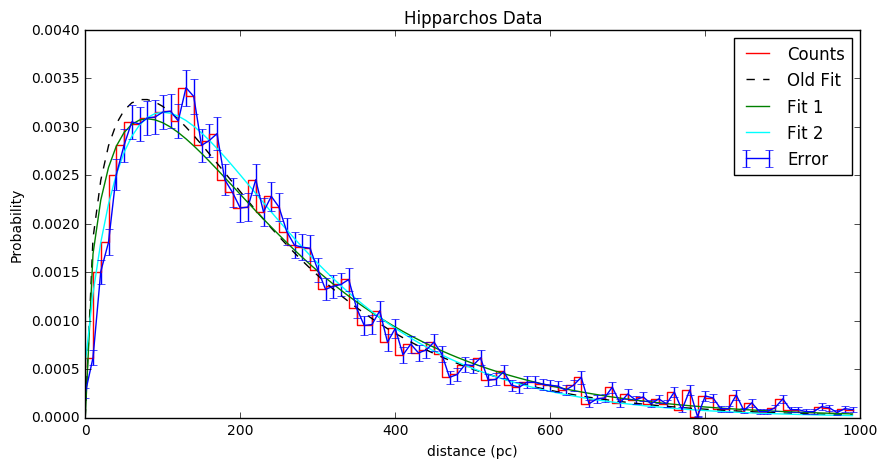

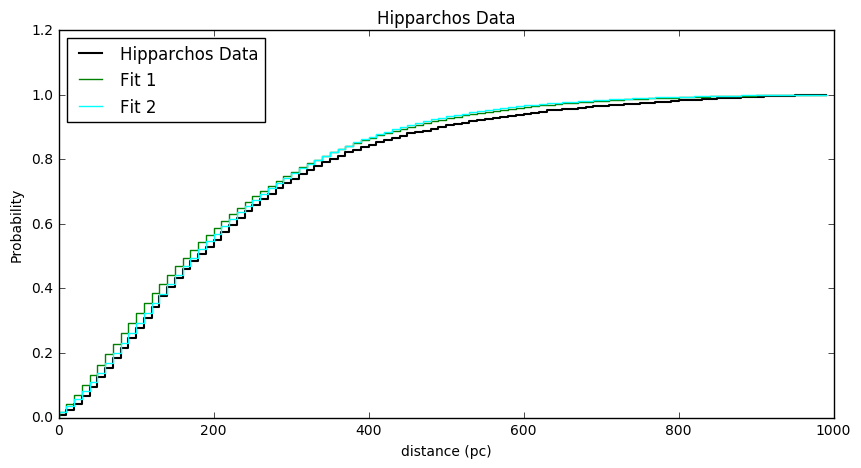

In [29]:
#-------------------------------------Making A Fake Hipparchos Data set-------------------------------------
print "From Day 3"
#Day 3 plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'black', label = 'Old Fit', linestyle='--')
ax.plot(bins1,norm_Y, color = 'green', label = 'Fit 1')
ax.plot(bins1,norm_Y2, color = 'cyan', label = 'Fit 2')
ax.errorbar(bins1, counts_one_hundred, yerr=sigma, color = 'blue', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
#ax.set_axis_bgcolor('black') #color the background
plt.show()


#Convert model (Y2) to cumuluative probability(np.cumsum(counts))
CumulSum = np.cumsum(counts)
CumulSum2 = np.cumsum(norm_Y2*binwidth)
CumulSum1 = np.cumsum(normalized_y*binwidth)
CumulSum_tentho = np.cumsum(normalized_y_tenthou*binwidth_tenthou)

#Cumulative Probabilities plot for original data, 1st and 2nd models
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, CumulSum, color = 'black', label = 'Hipparchos Data', linewidth=1.5)
ax.step(bins1,CumulSum1, color = 'green', label = 'Fit 1')
ax.step(bins1,CumulSum2, color = 'cyan', label = 'Fit 2')
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
#ax.set_axis_bgcolor('black') #color the background
plt.show()



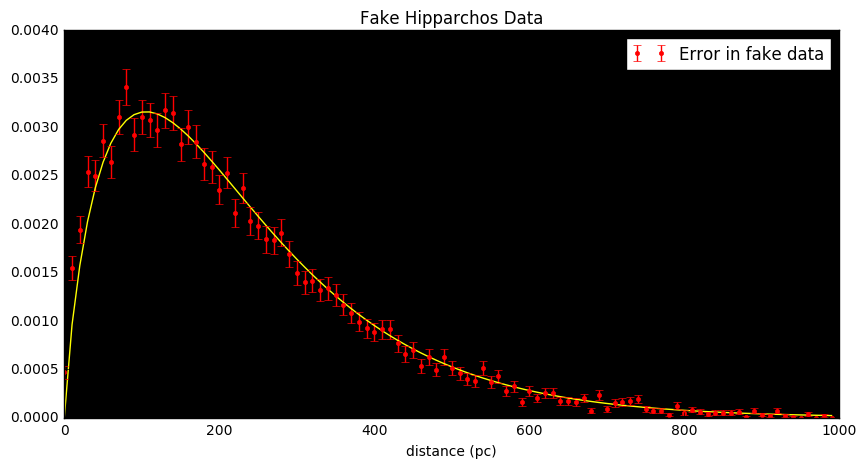

Chi Squared for fake data: 203.039300248
Reduced Chi Squared for fake data: 2.03039300248


In [27]:
fake_data = np.random.uniform(0,1,10000) #create random 10,000 points

bins_tenthousand = np.linspace(0,1000, 10000) #10,000 bins

# print "10000 bins:", bins_tenthousand
# print""

bins_tenthousand_binwidth = (np.max(bins_tenthousand)-np.min(bins_tenthousand))/len(bins_tenthousand)
bins_tenthousand_center = bins_tenthousand+bins_tenthousand_binwidth #bins shifted by half a bin width

y_tenthou =(bins_tenthousand**P_best)*np.exp((-1.0*bins_tenthousand/DS_best))  # 2nd model with 10,000 bins
normalized_y_tenthou = y_tenthou/(np.sum(y_tenthou)*bins_tenthousand_binwidth) # used for more detailed results

CumulSum_tentho = np.cumsum(normalized_y_tenthou*bins_tenthousand_binwidth) #cumulative probability of 10,000 binned
#                                                                            2nd model

Pcum = CumulSum_tentho
# print "pcum:", Pcum
# print ""
dmodel = bins_tenthousand
drandom = dmodel[np.searchsorted(Pcum,fake_data)]
# print "fake distances:", drandom
# print ""
#print fake_data
#print drandom#; print np.min(drandom); print np.max(drandom)

fake_counts0 = np.histogram(drandom,bins0)
fake_datalength = len(drandom)*1.0
fake_counts = fake_counts0[0]/fake_datalength

# dmax_fake = np.max(fake_bins); dmin_fake =np.min(fake_bins)
fake_binwidth = np.float(dmax-dmin)/len(bins1)

# print "fake binwidth:",fake_binwidth
# print "fake_Counts:", fake_counts0[0]
# print ""
# print "bins", bins0
# print ""
fakecounts = fake_counts/fake_binwidth

N_tot3 = np.float(len(drandom))

sigma3 = fakecounts/np.sqrt(fake_counts0[0])


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111) 
ax.set_axis_bgcolor('black')
#plt.plot(bins1,fakecounts, marker='o', markersize=3)
ax.plot(bins1,norm_Y2, color='yellow')
ax.errorbar(bins1, fakecounts, yerr=sigma3, color = 'red', label='Error in fake data', fmt='.' )
ax.set_title('Fake Hipparchos Data')
ax.set_xlabel('distance (pc)')
ax.legend(loc='upper right')
plt.show()


# print "sigma3:", sigma3
# print ""
# print "fake data - model:", (fakecounts-norm_Y2)
#ChiSq3 = np.nanmean(np.sum((np.divide((fakecounts - norm_Y2),sigma3))**2))

diff = (fakecounts-norm_Y2); #diff = diff[-1:]
#sigma3 = sigma3[-1:]

# print "fake data:",fakecounts
# print "model", norm_Y2

#print di

#ChiSq3 = np.sum(np.nanmean((diff/sigma3)**2))
ChiSq3 = np.nansum((diff/sigma3)**2)


#ChiSq3 = stats.mstats.chisquare(fakecounts,norm_Y2,ddof=0)

print "Chi Squared for fake data:", ChiSq3
DOF3 = len(bins1) -0 #0 parameters?
print "Reduced Chi Squared for fake data:", ChiSq3/DOF3
#print "Reduced Chi Squared for fake data:", np.min(ChiSq3)

In [30]:
#----------------------------------------------Day 5-------------------------------------------------------------------
#Let's make a heat map like form Day 3

ds_new=np.linspace(1,250,500)
p_new =np.linspace(0,2,500); 
len(DS)

ChiSq_new = np.empty((ds_new.size,p_new.size)); 


for ii in range(len(ds_new)):
    for jj in range(len(p_new)):
        y_new = (bins1**(p_new[jj]))*np.exp((-1.0*bins1/(ds_new[ii])))
        norm_y_new = y_new/(np.sum(y_new)*binwidth)
        ChiSq_new[ii,jj] = (np.sum(((fakecounts - norm_y_new)/sigma)**2))
        
print "Minimum Chi Squared value for new model:", np.min(ChiSq_new)


Minimum Chi Squared value for new model: 177.492088177


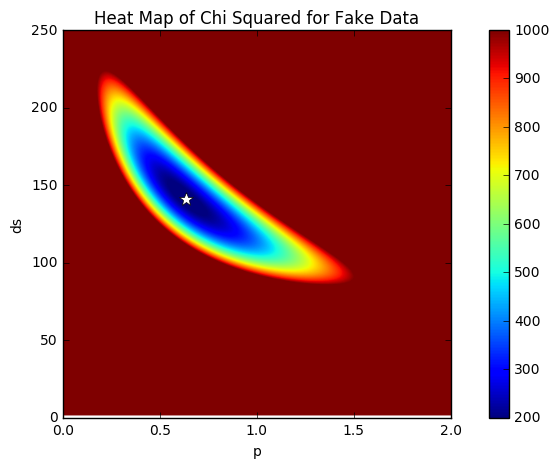

Minimum Chi Squared value for new model: 177.492088177
best DS value: 140.719438878
best P value: 0.633266533066


In [31]:
I,J = np.where(ChiSq_new==np.min(ChiSq_new))
#print i; print j

Y_NEW = (bins1**I)*np.exp((-1.0*bins1/J))
NORM_Y_NEW = Y_NEW/(np.sum(Y_NEW)*binwidth)

#plt.pcolormesh(x, y, intensity)
#plt.colorbar() #need a colorbar to show the intensity scale
#plt.show()
ds_best =ds_new[I[0]]; p_best=p_new[J[0]]


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
im = ax.imshow(ChiSq_new,extent=([p_new[0],p_new[-1],ds_new[0],ds_new[-1]]), aspect=0.008, vmin=200, vmax=1000, origin='lower')
fig.colorbar(im)
plt.plot(p_best,ds_best, markersize=10,color='white', marker='*')
plt.xlabel('p')
plt.ylabel('ds')
plt.title('Heat Map of Chi Squared for Fake Data')
plt.show()


print "Minimum Chi Squared value for new model:", np.min(ChiSq_new)
print "best DS value:", ds_best; print "best P value:", p_best


In [32]:
#--------------------------------------MCMC Algorithm----------------------------------------------------------------------------
#Let's use a one chain algorithm (Metropolis Hastings)
#make shit up

Nchain = 10000 #length of chain
A = np.empty(Nchain)
DS_mcmc = np.empty(Nchain)
P_mcmc = np.empty(Nchain)
ChiSq_mcmc = np.empty(Nchain)

P_mcmc[0] = 0.5
DS_mcmc[0] = 150

# from double for loop in heat map example
# y_new = (bins1**(p_new[jj]))*np.exp((-1.0*bins1/(ds_new[ii])))
# norm_y_new = y_new/(np.sum(y_new)*binwidth)
# ChiSq_new[ii,jj] = (np.sum(((fakecounts - norm_y_new)/sigma)**2))

#normalizeddata = counts/fakecounts
def get_chi2( p, ds, Bins, normalizedcounts, histogrammed_data ):
    y = (Bins**p)*np.exp(-Bins/float(ds))
    d_max = np.max(Bins)
    d_min =np.min(Bins)
    bin_width = np.float(d_max-d_min)/len(Bins)
    norm_y= y/(np.sum(y)*bin_width)
    sigma = normalizedcounts/np.sqrt(histogrammed_data[0])
    chi2 = (np.nansum(((normalizedcounts - norm_y)/sigma)**2))

    return chi2
    

ChiSq_mcmc[0] = get_chi2( P_mcmc[0], DS_mcmc[0], bins1, fakecounts, fake_counts0)

#DS_mcmc_step
#P_mcmc_step

for ii in range(1,Nchain):
    P_step = np.random.normal(loc=0,scale=0.1) #arguments (mean, sigma)
    DS_step= np.random.normal(loc=0,scale=10)

    DS_try = DS_mcmc[ii-1] + DS_step
    P_try = P_mcmc[ii-1] + P_step
    ChiSq_try = get_chi2(P_try, DS_try, bins1, fakecounts, fake_counts0)
    if ChiSq_try < ChiSq_mcmc[ii-1]:
        DS_mcmc[ii] = DS_try
        P_mcmc[ii] = P_try
        ChiSq_mcmc[ii] = ChiSq_try 
    else:
        R = np.random.uniform(0,1)
        if R < (np.exp((ChiSq_mcmc[ii-1]**2-ChiSq_try**2)/2.0)):
            DS_mcmc[ii] = DS_try
            P_mcmc[ii] = P_try
            ChiSq_mcmc[ii] = ChiSq_try 
        else:
            DS_mcmc[ii] = DS_mcmc[ii-1]
            P_mcmc[ii] = P_mcmc[ii-1]
            ChiSq_mcmc[ii] = ChiSq_mcmc[ii-1]


Chisq_mcmc: [ 244.43826709  244.43826709  244.43826709 ...,  158.33047207  158.33047207
  158.33047207]
Chisq_mcmc minimum: 158.330472071

Average of P_mcmc: 0.716392547826
best fit P: 0.821643286573

Average of DS_mcmc: 130.664867439
best fit DS: 128.244488978


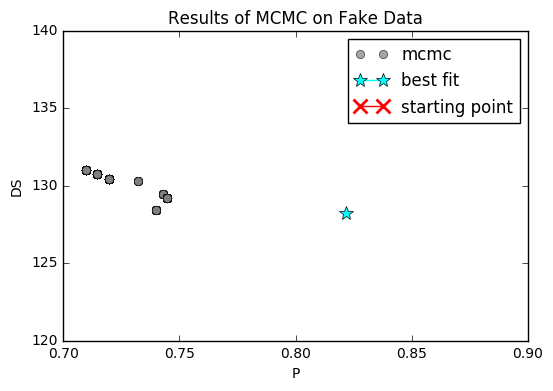

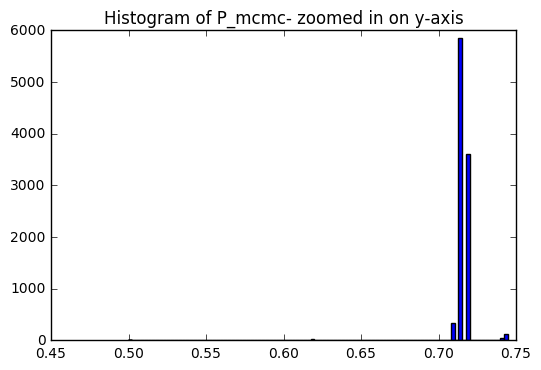

In [33]:
print "Chisq_mcmc:", ChiSq_mcmc    

print "Chisq_mcmc minimum:", np.min(ChiSq_mcmc)
print""
print "Average of P_mcmc:", np.mean(P_mcmc)
print "best fit P:", P_best
print""
print "Average of DS_mcmc:", np.mean(DS_mcmc)
print "best fit DS:", DS_best

plt.plot(P_mcmc,DS_mcmc, marker='o', linestyle='none', label='mcmc',alpha=0.7, color='grey' )
plt.plot(P_best,DS_best, marker = "*", color='cyan', markersize=10, label='best fit')
plt.plot(0.5,150,marker = "x", color='red', markersize=10, label='starting point', mew=2)
#plt.plot(P_mcmc[-1],DS_mcmc[-1], marker ="+", color='pink', markersize=10, label='ending point', mew=2)
plt.xlabel('P')
plt.ylabel('DS')
plt.title('Results of MCMC on Fake Data')
plt.legend(loc='best')
plt.xlim(0.7,0.9)
plt.ylim(120,140)
plt.show()

#P_chain = np.sort(P_mcmc); DS_chain = np.sort(DS_mcmc)
plt.hist(P_mcmc,bins=100)
#plt.ylim(0,70)
plt.title('Histogram of P_mcmc- zoomed in on y-axis')
plt.show()

#^^^^^^ THIS ISN"T QUITE RIGHT. SOMETHING IS SORT OF WRONG HERE.